In [1]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2018-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-02", tz="America/New_York").isoformat()

In [6]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["FB", "AMZN", "PG", "XOM", "JPM", "JNJ", "HON", "LIN", "AMT", "AAPL", "NEE"]

In [7]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

In [8]:
# Create the request of the data to fetch via the Alpaca SDK
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

prices_df

AAPL                                          \
                              open     high       low     close     volume   
time                                                                         
2018-01-02 00:00:00-05:00  170.160  172.300  169.2600  172.2600   20523941   
2018-01-03 00:00:00-05:00  172.530  174.550  171.9600  172.1800   23193409   
2018-01-04 00:00:00-05:00  172.540  173.470  172.0800  173.0200   17742231   
2018-01-05 00:00:00-05:00  173.440  175.370  173.0500  174.9600   18402859   
2018-01-08 00:00:00-05:00  174.310  175.610  173.9300  174.3400   15554212   
...                            ...      ...       ...       ...        ...   
2021-10-27 00:00:00-04:00  149.380  149.730  148.4900  148.8500   43201783   
2021-10-28 00:00:00-04:00  149.860  153.165  149.7200  152.4766   77772052   
2021-10-29 00:00:00-04:00  147.190  149.940  146.4128  149.8000  104258290   
2021-11-01 00:00:00-04:00  148.985  149.700  147.8000  148.9900   57758481   
2021-11-02 00:00:00-04:00  148.670  151.570  148.6500  150.0000   61741508   

                              AMT                                      ...  \
                             open    high     low    close     volume  ...   
time                                                                   ...   
2018-01-02 00:00:00-05:00  143.11  143.22  140.91  141.105  1391810.0  ...   
2018-01-03 00:00:00-05:00  141.05  142.50  140.86  141.570  1210542.0  ...   
2018-01-04 00:00:00-05:00  141.44  141.96  139.58  139.630  1037487.0  ...   
2018-01-05 00:00:00-05:00  140.23  140.70  139.59  140.490  1363577.0  ...   
2018-01-08 00:00:00-05:00  140.66  143.24  140.66  142.030  1350838.0  ...   
...                           ...     ...     ...      ...        ...  ...   
2021-10-27 00:00:00-04:00  288.22  291.17  285.31  285.380  1075895.0  ...   
2021-10-28 00:00:00-04:00  285.50  289.99  282.85  286.040  1162672.0  ...   
2021-10-29 00:00:00-04:00  284.23  284.93  279.64  281.710  1510135.0  ...   
2021-11-01 00:00:00-04:00  282.83  283.16  276.41  282.120  1197575.0  ...   
2021-11-02 00:00:00-04:00  282.81  285.29  279.51  282.650  1300858.0  ...   

                               PG                                      XOM  \
                             open    high      low   close   volume   open   
time                                                                         
2018-01-02 00:00:00-05:00   91.92   91.93   90.550   90.66  5257189  83.82   
2018-01-03 00:00:00-05:00   90.98   91.09   90.515   90.57  3976843  85.16   
2018-01-04 00:00:00-05:00   90.83   91.77   90.610   91.18  4316526  86.78   
2018-01-05 00:00:00-05:00   91.15   91.30   90.570   91.19  3848619  86.75   
2018-01-08 00:00:00-05:00   90.93   91.77   90.930   91.71  3298886  86.70   
...                           ...     ...      ...     ...      ...    ...   
2021-10-27 00:00:00-04:00  143.14  143.68  141.690  141.83  6682489  65.17   
2021-10-28 00:00:00-04:00  141.66  142.88  141.710  142.69  3512972  63.85   
2021-10-29 00:00:00-04:00  142.30  143.48  142.020  143.00  3422057  65.07   
2021-11-01 00:00:00-04:00  143.36  143.80  142.490  142.65  3830443  65.07   
2021-11-02 00:00:00-04:00  142.72  144.58  142.280  144.06  8615444  65.03   

                                                                
                              high      low    close    volume  
time                                                            
2018-01-02 00:00:00-05:00  85.1950  83.6600  85.0457   8932356  
2018-01-03 00:00:00-05:00  86.9650  84.8200  86.7000  11158484  
2018-01-04 00:00:00-05:00  87.2200  86.4300  86.8100   8186390  
2018-01-05 00:00:00-05:00  86.8800  85.7050  86.6900   8326333  
2018-01-08 00:00:00-05:00  87.1500  86.6034  87.0800   5989082  
...                            ...      ...      ...       ...  
2021-10-27 00:00:00-04:00  65.2500  63.9750  64.1300  18994633  
2021-10-28 00:00:00-04:00  64.4700  63.6300  64.3050  14838183  
2021-10-29 00:00:00-04:00  65.3600  

In [12]:
# Create a new empty DF that that holds only the closing prices of each stock
closing_prices_df = pd.DataFrame()

In [14]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  closing_prices_df[ticker] = prices_df[ticker]["close"]

closing_prices_df

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2018-01-02 00:00:00-05:00,181.43,1189.000,90.66,85.0457,108.00,139.2400,153.66,156.17,141.105,172.2600,155.11
2018-01-03 00:00:00-05:00,184.48,1202.740,90.57,86.7000,108.04,140.5300,152.45,157.52,141.570,172.1800,151.80
2018-01-04 00:00:00-05:00,184.32,1209.640,91.18,86.8100,109.05,140.5256,154.46,159.97,139.630,173.0200,150.93
2018-01-05 00:00:00-05:00,186.78,1229.070,91.19,86.6900,108.26,141.6600,155.47,161.27,140.490,174.9600,151.71
2018-01-08 00:00:00-05:00,188.25,1246.950,91.71,87.0800,108.48,141.8500,154.73,161.25,142.030,174.3400,152.98
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,312.22,3393.325,141.83,64.1300,167.83,163.7000,215.75,318.96,285.380,148.8500,85.01
2021-10-28 00:00:00-04:00,316.82,3444.500,142.69,64.3050,170.34,162.8700,218.49,317.82,286.040,152.4766,86.40
2021-10-29 00:00:00-04:00,323.58,3372.430,143.00,64.4700,169.94,162.8600,218.62,319.26,281.710,149.8000,85.29


In [15]:
# Calculate the daily returns for each of the stocks in the portfolio
daily_returns_df = closing_prices_df.pct_change().dropna()
daily_returns_df

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2018-01-03 00:00:00-05:00,0.016811,0.011556,-0.000993,0.019452,0.000370,0.009265,-0.007875,0.008644,0.003295,-0.000464,-0.021340
2018-01-04 00:00:00-05:00,-0.000867,0.005737,0.006735,0.001269,0.009348,-0.000031,0.013185,0.015554,-0.013703,0.004879,-0.005731
2018-01-05 00:00:00-05:00,0.013346,0.016063,0.000110,-0.001382,-0.007244,0.008073,0.006539,0.008127,0.006159,0.011213,0.005168
2018-01-08 00:00:00-05:00,0.007870,0.014548,0.005702,0.004499,0.002032,0.001341,-0.004760,-0.000124,0.010962,-0.003544,0.008371
2018-01-09 00:00:00-05:00,-0.001859,0.004948,-0.006760,-0.003101,0.006914,0.016567,0.008596,0.010357,-0.007393,-0.000057,-0.007125
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,-0.011336,0.005165,-0.007140,-0.025972,-0.020886,-0.012368,-0.011545,0.006723,-0.005402,-0.002747,-0.005149
2021-10-28 00:00:00-04:00,0.014733,0.015081,0.006064,0.002729,0.014956,-0.005070,0.012700,-0.003574,0.002313,0.024364,0.016351
2021-10-29 00:00:00-04:00,0.021337,-0.020923,0.002173,0.002566,-0.002348,-0.000061,0.000595,0.004531,-0.015138,-0.017554,-0.012847


In [18]:
# Calculate cumulative returns for the stocks portfolio
cumulative_returns_df = (1 + daily_returns_df).cumprod() - 1
cumulative_returns_df

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2018-01-03 00:00:00-05:00,0.016811,0.011556,-0.000993,0.019452,0.000370,0.009265,-0.007875,0.008644,0.003295,-0.000464,-0.021340
2018-01-04 00:00:00-05:00,0.015929,0.017359,0.005736,0.020745,0.009722,0.009233,0.005206,0.024332,-0.010453,0.004412,-0.026949
2018-01-05 00:00:00-05:00,0.029488,0.033701,0.005846,0.019334,0.002407,0.017380,0.011779,0.032657,-0.004358,0.015674,-0.021920
2018-01-08 00:00:00-05:00,0.037590,0.048738,0.011582,0.023920,0.004444,0.018745,0.006963,0.032529,0.006555,0.012075,-0.013732
2018-01-09 00:00:00-05:00,0.035661,0.053928,0.004743,0.020745,0.011389,0.035622,0.015619,0.043222,-0.000886,0.012017,-0.020759
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,0.720884,1.853932,0.564417,-0.245935,0.553981,0.175668,0.404074,1.042390,1.022466,-0.135899,-0.451937
2021-10-28 00:00:00-04:00,0.746238,1.896972,0.573902,-0.243877,0.577222,0.169707,0.421906,1.035090,1.027143,-0.114846,-0.442976
2021-10-29 00:00:00-04:00,0.783498,1.836358,0.577322,-0.241937,0.573519,0.169635,0.422752,1.044311,0.996457,-0.130384,-0.450132


<AxesSubplot:title={'center':'Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

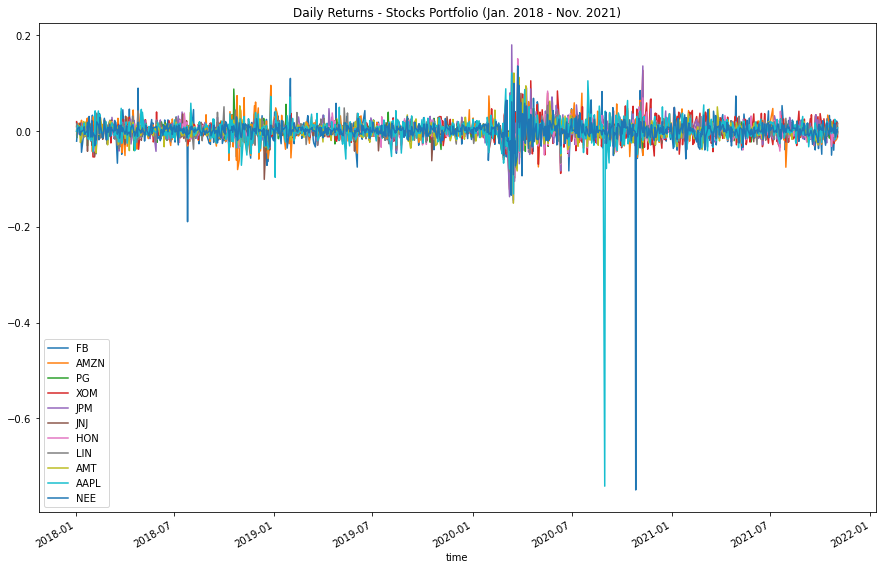

In [21]:
# Plot daily returns for the stocks portfolio
daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)")

<AxesSubplot:title={'center':'Cumulative Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

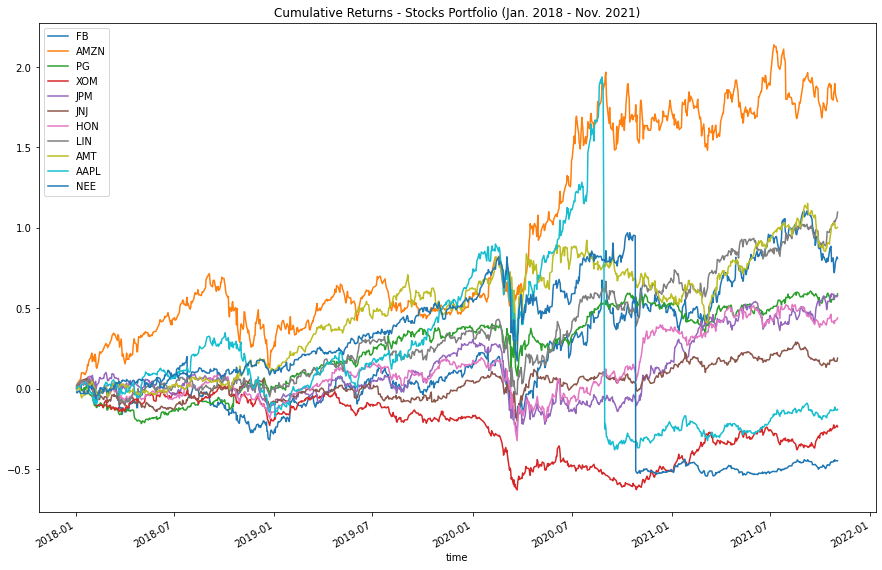

In [22]:
# Plot the cumulative returns for the Stocks Portfolio
cumulative_returns_df.plot(figsize=(15,10), title="Cumulative Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)")

In [24]:
# Set up Monte Carlo Simulation for a 5 year time period with a $10,000 initial investment
MC_five_year = MCSimulation(
  portfolio_data=prices_df,
  weights=[.091, .091, .091, .091, .091, .091, .091, .091, .091, .091, .09],
  num_simulation=1000,
  num_trading_days=252 * 5
)

MC_five_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-01-02 00:00:00-05:00  170.16  172.30  169.26  172.26  20523941   
2018-01-03 00:00:00-05:00  172.53  174.55  171.96  172.18  23193409   
2018-01-04 00:00:00-05:00  172.54  173.47  172.08  173.02  17742231   
2018-01-05 00:00:00-05:00  173.44  175.37  173.05  174.96  18402859   
2018-01-08 00:00:00-05:00  174.31  175.61  173.93  174.34  15554212   

                                           AMT                           ...  \
                          daily_return    open    high     low    close  ...   
time                                                                     ...   
2018-01-02 00:00:00-05:00          NaN  143.11  143.22  140.91  141.105  ...   
2018-01-03 00:00:00-05:00    -0.000464  141.05  142.50  140.86  141.570  ...   
2018-01-04 00:00:00-05:00     0.004879  141.44  141.96  139.58  139.630  ...   
2018-01-05 00:00:00-05:00     0.011213  140.23  140.70  139.59  140.490  ...   
2018-01-08 00:00:00-05:00    -0.003544  140.66  143.24  140.66  142.030  ...   

                               PG                                 XOM          \
                              low  close   volume daily_return   open    high   
time                                                                            
2018-01-02 00:00:00-05:00  90.550  90.66  5257189          NaN  83.82  85.195   
2018-01-03 00:00:00-05:00  90.515  90.57  3976843    -0.000993  85.16  86.965   
2018-01-04 00:00:00-05:00  90.610  91.18  4316526     0.006735  86.78  87.220   
2018-01-05 00:00:00-05:00  90.570  91.19  3848619     0.000110  86.75  86.880   
2018-01-08 00:00:00-05:00  90.930  91.71  3298886     0.005702  86.70  87.150   

                                                                    
                               low    close    volume daily_return  
time                                                                
2018-01-02 00:00:00-05:00  83.6600  85.0457   8932356          NaN  
2018-01-03 00:00:00-05:00  84.8200  86.7000  11158484     0.019452  
2018-01-04 00:00:00-05:00  86.4300  86.8100   8186390     0.001269  
2018-01-05 00:00:00-05:00  85.7050  86.6900   8326333    -0.001382  
2018-01-08 00:00:00-05:00  86.6034  87.0800   5989082     0.004499  

[5 rows x 66 columns]

In [25]:
# Run the Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999084,0.993004,1.005878,1.000432,0.999942,0.998416,0.986448,1.005783,0.993211,0.997037,...,1.005390,1.009344,1.005185,0.993947,1.004315,1.004364,1.001708,1.008894,1.000622,1.008700
2,1.003291,0.992485,1.011207,1.009744,1.009359,0.990040,0.988989,1.004779,0.995057,0.998571,...,0.995376,1.010219,1.010081,0.988467,1.017139,1.004486,0.995693,1.022915,1.014069,1.010184
3,1.010927,0.990744,1.020883,0.998013,1.009710,0.983368,0.986188,0.998397,0.988462,1.007220,...,0.989363,1.011871,1.004864,0.985294,1.018963,0.997808,0.998549,1.016597,1.019271,1.005823
4,1.002279,0.994969,1.012479,0.989093,1.010565,0.977542,0.988973,1.005652,0.997132,1.008235,...,0.987955,1.004533,1.006944,0.977650,1.012320,1.014025,1.004919,1.013245,1.006556,0.999946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.817550,1.985939,1.939691,1.873950,2.226041,2.130641,1.469316,2.424632,1.585426,2.385200,...,1.721801,1.766761,1.913295,1.700263,1.794222,2.561538,2.674533,2.179925,2.389047,1.427177
1257,1.817867,1.988436,1.941940,1.874895,2.231499,2.127550,1.465906,2.431508,1.594070,2.374560,...,1.740375,1.751572,1.926722,1.695284,1.782183,2.543099,2.651351,2.186684,2.364604,1.421629
1258,1.828366,1.974532,1.939105,1.882994,2.243453,2.158170,1.465000,2.414661,1.607891,2.348470,...,1.742124,1.749531,1.935385,1.693992,1.796568,2.552795,2.638672,2.181613,2.360385,1.421896
1259,1.826361,1.978926,1.923807,1.875437,2.264535,2.172018,1.459382,2.411268,1.609605,2.374670,...,1.749553,1.744612,1.934556,1.699348,1.798463,2.570382,2.646376,2.190348,2.356004,1.422714


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

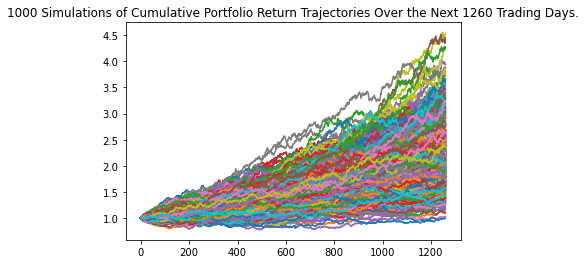

In [26]:
# Visualize the 5-year Monte Carlo simulation by creating an
# overlay line plot
MC_five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

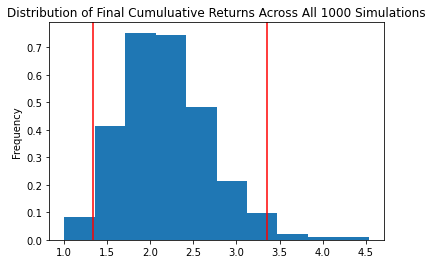

In [27]:
# Visualize the probability distribution of the 5-year Monte Carlo simulation 
# by plotting a histogram
MC_five_year.plot_distribution()

In [28]:
# Generate summary statistics from the 5-year Monte Carlo simulation results
# Save the results as a variable
MC_five_year_summary_statistics = MC_five_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_five_year_summary_statistics)

count           1000.000000
mean               2.182637
std                0.514510
min                1.003194
25%                1.826163
50%                2.135321
75%                2.486777
max                4.533205
95% CI Lower       1.339028
95% CI Upper       3.355778
Name: 1260, dtype: float64


In [31]:
# Calculate the confidence index lower and upper projections for a $10,000 initial investment
five_year_lower_ci = round(MC_five_year_summary_statistics[8]*10000, 2)
five_year_upper_ci = round(MC_five_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${five_year_lower_ci} and ${five_year_upper_ci}")

With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of $13390.28 and $33557.78


In [32]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment
MC_ten_year = MCSimulation(
  portfolio_data=prices_df,
  weights=[.091, .091, .091, .091, .091, .091, .091, .091, .091, .091, .09],
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_ten_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-01-02 00:00:00-05:00  170.16  172.30  169.26  172.26  20523941   
2018-01-03 00:00:00-05:00  172.53  174.55  171.96  172.18  23193409   
2018-01-04 00:00:00-05:00  172.54  173.47  172.08  173.02  17742231   
2018-01-05 00:00:00-05:00  173.44  175.37  173.05  174.96  18402859   
2018-01-08 00:00:00-05:00  174.31  175.61  173.93  174.34  15554212   

                                           AMT                           ...  \
                          daily_return    open    high     low    close  ...   
time                                                                     ...   
2018-01-02 00:00:00-05:00          NaN  143.11  143.22  140.91  141.105  ...   
2018-01-03 00:00:00-05:00    -0.000464  141.05  142.50  140.86  141.570  ...   
2018-01-04 00:00:00-05:00     0.004879  141.44  141.96  139.58  139.630  ...   
2018-01-05 00:00:00-05:00     0.011213  140.23  140.70  139.59  140.490  ...   
2018-01-08 00:00:00-05:00    -0.003544  140.66  143.24  140.66  142.030  ...   

                               PG                                 XOM          \
                              low  close   volume daily_return   open    high   
time                                                                            
2018-01-02 00:00:00-05:00  90.550  90.66  5257189          NaN  83.82  85.195   
2018-01-03 00:00:00-05:00  90.515  90.57  3976843    -0.000993  85.16  86.965   
2018-01-04 00:00:00-05:00  90.610  91.18  4316526     0.006735  86.78  87.220   
2018-01-05 00:00:00-05:00  90.570  91.19  3848619     0.000110  86.75  86.880   
2018-01-08 00:00:00-05:00  90.930  91.71  3298886     0.005702  86.70  87.150   

                                                                    
                               low    close    volume daily_return  
time                                                                
2018-01-02 00:00:00-05:00  83.6600  85.0457   8932356          NaN  
2018-01-03 00:00:00-05:00  84.8200  86.7000  11158484     0.019452  
2018-01-04 00:00:00-05:00  86.4300  86.8100   8186390     0.001269  
2018-01-05 00:00:00-05:00  85.7050  86.6900   8326333    -0.001382  
2018-01-08 00:00:00-05:00  86.6034  87.0800   5989082     0.004499  

[5 rows x 66 columns]

In [33]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004315,0.990968,1.002883,1.010376,0.994710,0.999979,0.996078,0.994457,1.006325,1.005382,...,1.011875,1.008967,0.995179,0.991474,0.996580,1.000992,0.998531,1.000251,1.002385,0.999417
2,0.995095,0.996931,0.991321,0.994543,0.997384,1.003177,1.007328,0.996982,1.004471,1.013483,...,1.012581,1.006227,1.003129,0.997746,1.004036,1.011321,1.000781,0.989201,1.004443,0.994553
3,0.993138,1.002980,0.983482,0.995024,1.000032,1.019789,1.013948,0.998216,1.011381,1.025527,...,1.011952,0.994745,1.003817,1.001646,1.006480,1.016108,0.991430,0.979541,1.011888,1.008180
4,0.990742,1.000985,0.987870,0.980002,0.998025,1.022776,1.010393,1.000724,1.025626,1.028471,...,1.013605,0.999792,1.014829,0.995540,0.996097,1.029303,0.990596,0.973510,1.019598,1.019306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.873138,5.879897,8.510431,5.719451,4.204466,5.323488,2.581547,4.873788,3.952777,3.210027,...,5.205167,5.752459,4.319428,4.352787,3.660534,4.700449,3.850979,3.046883,10.681393,7.057649
2517,6.894089,5.875670,8.497895,5.740676,4.172129,5.375485,2.557218,4.883371,3.925257,3.222912,...,5.217331,5.765595,4.354343,4.348774,3.663258,4.710233,3.851272,3.089642,10.612400,7.123349
2518,6.869506,5.819666,8.433781,5.805396,4.182922,5.413099,2.584224,4.876362,3.936207,3.251350,...,5.262910,5.834176,4.369476,4.380896,3.634727,4.688805,3.844408,3.116193,10.714484,7.129743
2519,6.829378,5.796324,8.421340,5.835899,4.169639,5.424558,2.613371,4.907093,3.957474,3.238027,...,5.315379,5.893418,4.319844,4.422635,3.652250,4.728102,3.821914,3.120473,10.803712,7.104435


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

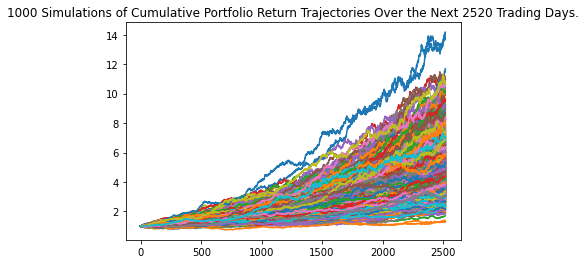

In [34]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

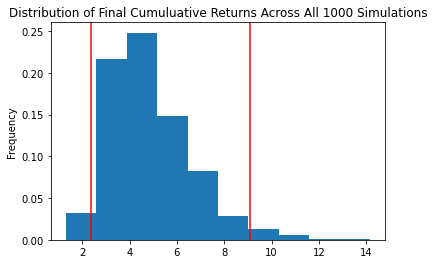

In [35]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_year.plot_distribution()

In [36]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_year_summary_statistics = MC_ten_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_ten_year_summary_statistics)

count           1000.000000
mean               4.876504
std                1.733203
min                1.303693
25%                3.645913
50%                4.605868
75%                5.748890
max               14.169664
95% CI Lower       2.355871
95% CI Upper       9.107195
Name: 2520, dtype: float64


In [37]:
# Calculate the confidence index lower and upper projections for a $10,000 initial investment
ten_year_lower_ci = round(MC_ten_year_summary_statistics[8]*10000, 2)
ten_year_upper_ci = round(MC_ten_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 10 years, will be in the range of ${ten_year_lower_ci} and ${ten_year_upper_ci}")

With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 10 years, will be in the range of $23558.71 and $91071.95


In [38]:
# Set up Monte Carlo Simulation for a 15-year time period with a $10,000 initial investment
MC_fifteen_year = MCSimulation(
  portfolio_data=prices_df,
  weights=[.091, .091, .091, .091, .091, .091, .091, .091, .091, .091, .09],
  num_simulation=1000,
  num_trading_days=252 * 15
)

MC_fifteen_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-01-02 00:00:00-05:00  170.16  172.30  169.26  172.26  20523941   
2018-01-03 00:00:00-05:00  172.53  174.55  171.96  172.18  23193409   
2018-01-04 00:00:00-05:00  172.54  173.47  172.08  173.02  17742231   
2018-01-05 00:00:00-05:00  173.44  175.37  173.05  174.96  18402859   
2018-01-08 00:00:00-05:00  174.31  175.61  173.93  174.34  15554212   

                                           AMT                           ...  \
                          daily_return    open    high     low    close  ...   
time                                                                     ...   
2018-01-02 00:00:00-05:00          NaN  143.11  143.22  140.91  141.105  ...   
2018-01-03 00:00:00-05:00    -0.000464  141.05  142.50  140.86  141.570  ...   
2018-01-04 00:00:00-05:00     0.004879  141.44  141.96  139.58  139.630  ...   
2018-01-05 00:00:00-05:00     0.011213  140.23  140.70  139.59  140.490  ...   
2018-01-08 00:00:00-05:00    -0.003544  140.66  143.24  140.66  142.030  ...   

                               PG                                 XOM          \
                              low  close   volume daily_return   open    high   
time                                                                            
2018-01-02 00:00:00-05:00  90.550  90.66  5257189          NaN  83.82  85.195   
2018-01-03 00:00:00-05:00  90.515  90.57  3976843    -0.000993  85.16  86.965   
2018-01-04 00:00:00-05:00  90.610  91.18  4316526     0.006735  86.78  87.220   
2018-01-05 00:00:00-05:00  90.570  91.19  3848619     0.000110  86.75  86.880   
2018-01-08 00:00:00-05:00  90.930  91.71  3298886     0.005702  86.70  87.150   

                                                                    
                               low    close    volume daily_return  
time                                                                
2018-01-02 00:00:00-05:00  83.6600  85.0457   8932356          NaN  
2018-01-03 00:00:00-05:00  84.8200  86.7000  11158484     0.019452  
2018-01-04 00:00:00-05:00  86.4300  86.8100   8186390     0.001269  
2018-01-05 00:00:00-05:00  85.7050  86.6900   8326333    -0.001382  
2018-01-08 00:00:00-05:00  86.6034  87.0800   5989082     0.004499  

[5 rows x 66 columns]

In [39]:
# Run the Monte Carlo simulation to forecast 15 years cumulative returns
MC_fifteen_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993628,0.997948,1.007242,0.991923,0.996050,1.015928,0.991190,1.005269,0.999991,0.996446,...,0.999615,0.988311,0.983489,1.000667,0.997968,0.998840,1.003965,1.001090,1.005298,0.993326
2,0.979459,0.989896,1.007111,0.990808,0.990652,1.018072,0.995035,1.001623,1.000157,1.003075,...,1.000594,0.981758,0.987522,1.006218,0.993308,1.001227,0.997853,0.999947,1.004039,1.001067
3,0.973391,0.993490,1.011197,0.981134,0.999259,1.018070,0.998438,0.998690,0.999666,1.016655,...,1.006269,0.963646,0.988106,1.014993,0.994316,1.007676,0.997329,1.003376,0.997607,1.002933
4,0.972838,0.992707,1.008094,0.989395,1.004529,1.013533,0.999579,0.998734,0.994196,1.016854,...,1.005746,0.976217,0.994158,1.015544,0.994838,1.006981,0.994757,0.986840,0.995943,1.004789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,14.357532,12.273578,13.757627,6.487700,12.990179,12.661530,8.906345,15.886098,7.218172,6.790719,...,15.131757,12.927970,8.694594,16.454237,12.534476,8.088722,10.200591,10.692156,11.572496,12.831371
3777,14.396299,12.208467,13.841379,6.532542,13.057242,12.652924,8.864316,15.876112,7.210505,6.758418,...,14.902854,12.966490,8.683009,16.423723,12.423034,8.138100,10.353698,10.796739,11.631789,12.917875
3778,14.434790,12.154993,13.755906,6.518766,13.213815,12.750231,8.851713,16.079146,7.171100,6.778677,...,14.957887,13.000893,8.663946,16.435820,12.560262,8.138119,10.423690,10.965962,11.622297,12.943369
3779,14.401019,12.139505,13.640224,6.515464,13.209430,12.572551,8.804207,16.045788,7.236353,6.749463,...,15.073791,13.018747,8.710415,16.569063,12.524505,8.183394,10.414757,10.872960,11.660427,12.792821


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 3780 Trading Days.'}>

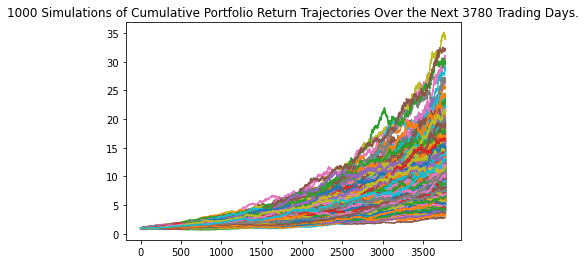

In [40]:
# Visualize the 15-year Monte Carlo simulation by creating an
# overlay line plot
MC_fifteen_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

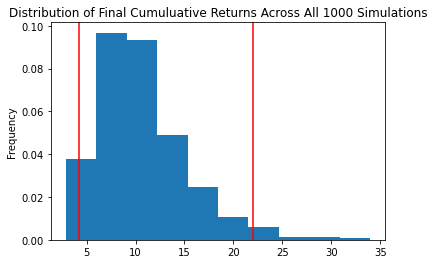

In [41]:
# Visualize the probability distribution of the 15-year Monte Carlo simulation 
# by plotting a histogram
MC_fifteen_year.plot_distribution()

In [42]:
# Generate summary statistics from the 15-year Monte Carlo simulation results
# Save the results as a variable
MC_fifteen_year_summary_statistics = MC_fifteen_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_fifteen_year_summary_statistics)

count           1000.000000
mean              10.644417
std                4.506852
min                2.874069
25%                7.487117
50%                9.790443
75%               12.887349
max               33.971672
95% CI Lower       4.261108
95% CI Upper      21.996486
Name: 3780, dtype: float64


In [43]:
# Calculate the confidence index lower and upper projections for a $10,000 initial investment
fifteen_year_lower_ci = round(MC_fifteen_year_summary_statistics[8]*10000, 2)
fifteen_year_upper_ci = round(MC_fifteen_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 10 years, will be in the range of ${fifteen_year_lower_ci} and ${fifteen_year_upper_ci}")

With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 10 years, will be in the range of $42611.08 and $219964.86
